# Data analysis: Weather
In the file `weather_dataset.csv` you find weather data for various cities. It is up to you to clean and analyse this data. Use the provided code fields under the tasks to write down your code. 

Import the necessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

* Import the weather dataset into a DataFrame named `df_weather`
* Inspect the DataFrame by showing the first 10 rows (do not use slicing for this).


In [2]:
#Import and inspect
df_weather = pd.read_csv("weather_dataset.csv") 
df_weather.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,...,1.7,4.1,2.8,0.96,1.0258,0.27,0.00,6.0,3.3,8.8
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,...,3.5,6.4,3.6,0.97,1.0210,0.18,0.14,8.2,5.3,11.0
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,...,3.3,5.1,3.0,0.91,1.0280,0.43,0.02,5.6,3.7,7.6
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,...,0.0,5.5,1.9,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


* Change the dates in the DATE column to pandas datetime objects.
* Only include the rows with data from 2009


In [ ]:
#datetime objects, year 2009
df_weather ["DATE"] = pd.to_datetime(df_weather["DATE"], format= "%Y%m%d")
df_weather = df_weather[df_weather["DATE"].dt.year == 2009]

           DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
3288 2009-01-01      1                  4            0.84          1.0284   
3289 2009-01-02      1                  8            0.89          1.0262   
3290 2009-01-03      1                  5            0.72          1.0263   
3291 2009-01-04      1                  4            0.75          1.0239   
3292 2009-01-05      1                  8            0.84          1.0197   
...         ...    ...                ...             ...             ...   
3648 2009-12-27     12                  7            0.80          1.0118   
3649 2009-12-28     12                  7            0.82          1.0084   
3650 2009-12-29     12                  7            0.92          1.0028   
3651 2009-12-30     12                  8            0.92          0.9979   
3652 2009-12-31     12                  7            0.93          0.9958   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
3288  

* Remove the rows with NaN values.

In [4]:
#NaN
df_weather = df_weather.dropna()

* Create 4 different DataFrames, one for each of the following cities: Basel, Oslo, Roma and Maastricht. Name them `df_Basel`, `df_Oslo`, `df_Roma` and `df_Maastricht` respectively.
* Each dataframe should include the columns with the dates and months and the columns with the data of the corresponding city. 



In [5]:
df_Basel = pd.concat([df_weather[["DATE", "MONTH"]], df_weather[[col for col in df_weather.columns if "BASEL" in col]]], axis=1)
df_Oslo = pd.concat([df_weather[["DATE", "MONTH"]], df_weather[[col for col in df_weather.columns if "OSLO" in col]]], axis=1)
df_Roma = pd.concat([df_weather[["DATE", "MONTH"]], df_weather[[col for col in df_weather.columns if "ROMA" in col]]], axis=1)
df_Maastricht = pd.concat([df_weather[["DATE", "MONTH"]], df_weather[[col for col in df_weather.columns if "MAASTRICHT" in col]]], axis=1)

In [6]:
# Alternative with loop and dict
cities = ["BASEL", "OSLO", "ROMA", "MAASTRICHT"]
df_cities = {}
for city in cities:
    cols = [col for col in df_weather.columns if city in col]
    df_city = pd.concat([df_weather[["DATE", "MONTH"]], df_weather[cols]], axis=1)
    df_cities[city] = df_city

df_Basel = df_cities["BASEL"]
df_Oslo = df_cities["OSLO"]
df_Roma = df_cities["ROMA"]
df_Maastricht = df_cities["MAASTRICHT"]

### Maastricht
Plot a figure displaying following information of the temperature measurements over time done in Maastricht:
* Temperature in °C is displayed on the y-axis
* Mean temperature in orange
* Max temperature in red
* Min temperature in blue
* Display a legend with appropriate labels, indicating which data is shown
* Ensure proper axis labels and a title are included
* On the x-axis, ensure there are indications for every month, labeled with the abbreviation of the month in English (Jan, Feb, Mar etc.) 

[]

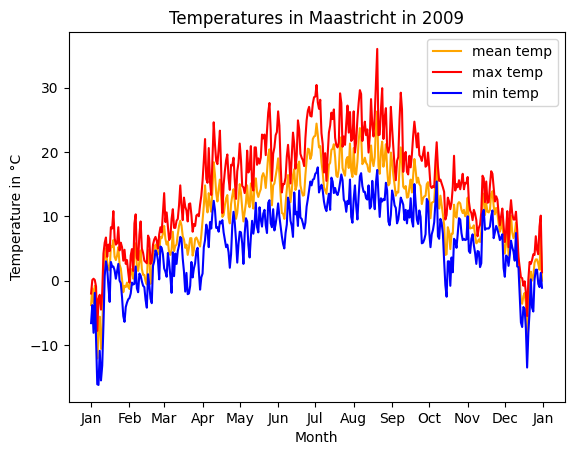

In [7]:
#Maastricht
plt.figure()
plt.plot(df_Maastricht["DATE"],df_Maastricht["MAASTRICHT_temp_mean"], color = "orange", label = "mean temp" )
plt.plot(df_Maastricht["DATE"],df_Maastricht["MAASTRICHT_temp_max"], color = "red", label = "max temp" )
plt.plot(df_Maastricht["DATE"],df_Maastricht["MAASTRICHT_temp_min"], color = "blue", label = "min temp" )
plt.legend()
plt.title("Temperatures in Maastricht in 2009")
plt.ylabel("Temperature in °C")
plt.xlabel("Month")

# x-ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))

#Hard coded alternative

# months = [month[:3] for month in df_Maastricht["DATE"].dt.month_name().unique()]
# ticks = [f"2009-{month:02}" for month in range(1,13)]
# plt.xticks(ticks= ticks, labels=months)

plt.plot()

### Mean temperatures
Create a new graph and plot the mean temperatures over time of the cities for which you created seperate dataframes. Temperatures are in degrees Celcius and displayed on the y-axis.
* Maastricht in orange
* Roma in red
* Basel in green
* Oslo in blue
* Display a legend with appropriate labels so it is clear what data is shown
* Ensure proper axis labels and a title are included
* On the x-axis, ensure indications for every month, labeled with the abbreviation of the month in English (Jan, Feb, Mar etc.) 
* Show a grid 

[]

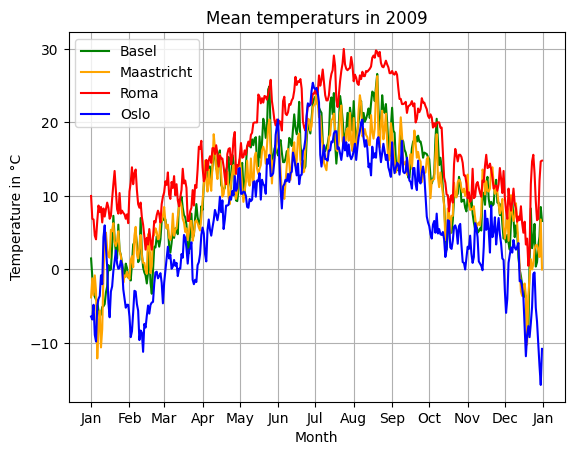

In [ ]:
#Mean temperatures
plt.figure()
plt.plot(df_Basel["DATE"], df_Basel["BASEL_temp_mean"], color = "green", label="Basel")
plt.plot(df_Maastricht["DATE"], df_Maastricht["MAASTRICHT_temp_mean"], color = "Orange", label="Maastricht")
plt.plot(df_Roma["DATE"], df_Roma["ROMA_temp_mean"], color = "red", label="Roma")
plt.plot(df_Oslo["DATE"], df_Oslo["OSLO_temp_mean"], color = "blue", label="Oslo")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))

#plt.xticks(ticks= ticks, labels=months) #Hardcoded alternative

plt.legend()
plt.title("Mean temperaturs in 2009")
plt.xlabel("Month")
plt.ylabel("Temperature in °C")
plt.grid()
plt.plot()

___

Check your work thouroughly and ensure you did all the tasks.  
There are no tests provided for this data analysis exercise. Ensure you used the right names. 

___
